In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from IPython.display import display, Markdown

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


In [2]:
df = pd.read_csv('./data/train_data.csv')

#### Kiểm tra đồ thị ACF và PACF phần dư của mô hình ARIMA(0,1,0) tức d=1 , p=q=0
Như chúng ta đã đã có sai phân bậc một (difference level 1)  giá đóng cửa điều chỉnh của của Bitcoin cho nên nó chính là phần dư của mô hình ARIMA(0,1,0)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 0.98, 'Biểu đồ  ACF và PACF của phần dư ARIMA(0,1,0)')

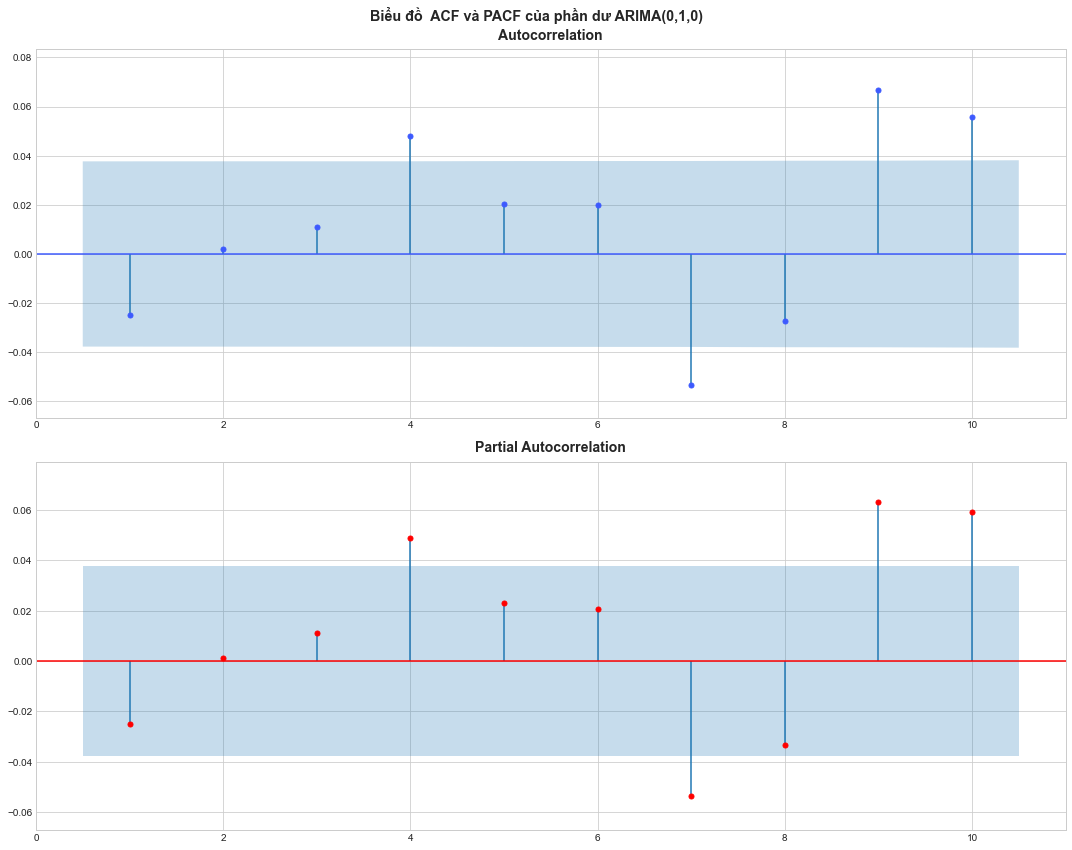

In [3]:
fig, ax = plt.subplots(2,1,figsize=(15, 12))
chart = plot_acf(df['price_diff_1'],lags=range(1,11),ax=ax[0],auto_ylims=True,color='#3d5afe',markerfacecoloralt='green')
chart = plot_pacf(df['price_diff_1'],lags=range(1,11),ax=ax[1],auto_ylims=True,color='red')
plt.suptitle("Biểu đồ  ACF và PACF của phần dư ARIMA(0,1,0)", fontsize="x-large",fontweight="bold")


| No | ACF and PACF Plot conditions  | Candidate Model  |
| --- | ----------- | ----------- |
| 1 | Real ACF at the 1st lag, 2,..., q and cuts off </br>on lag-q PACF dies down | ARIMA (0, d, q |
| 2 | ACF dies down Real PACF on lag-p and cuts off after lag-p | ARIMA (p, d, 0)  |
| 3 | Real ACF on lag-q and cuts off after lag-q </br> Real PACF on lag-p and cuts off after lag-p | ARIMA (0, d, q) if ACF cuts off sharper,  ARIMA (p, d, 0) </br> if PACF cuts off Sharpe |
| 4 | There is no real autocorrelation on the ACF and PACF plots | ARIMA (0, d, 0) |
| 5 | ACF dies down PACF dies down | ARIMA (p, d, q)  |

In [4]:
acf, _ = sm.tsa.acf(df['price_diff_1'],nlags=11, alpha=0.05)
pacf, _= sm.tsa.pacf(df['price_diff_1'],nlags=11, alpha=0.05)

ac_table = pd.DataFrame()
ac_table['acf']  = acf[1:]
ac_table['pacf'] = pacf[1:]

display(Markdown(ac_table.to_markdown()))

|    |         acf |        pacf |
|---:|------------:|------------:|
|  0 | -0.0249755  | -0.0249847  |
|  1 |  0.00196091 |  0.00133896 |
|  2 |  0.0111605  |  0.0112623  |
|  3 |  0.0480925  |  0.0487577  |
|  4 |  0.0203941  |  0.022909   |
|  5 |  0.0197653  |  0.020705   |
|  6 | -0.0532794  | -0.0537715  |
|  7 | -0.0274326  | -0.0335189  |
|  8 |  0.0666741  |  0.0632924  |
|  9 |  0.0558027  |  0.0593235  |
| 10 |  0.00537835 |  0.013558   |